In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_points = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

In [3]:
data_points.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [4]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data_points)

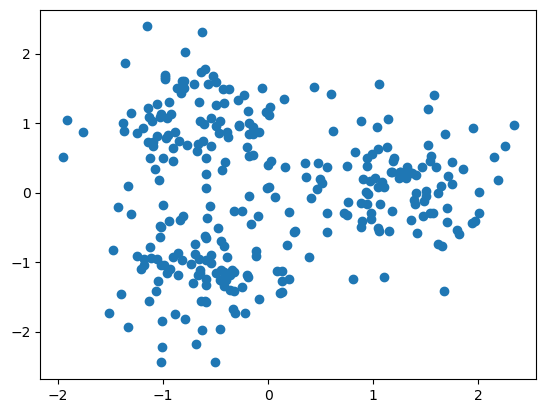

In [5]:
plt.scatter(data_points['x'], data_points['y']);

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

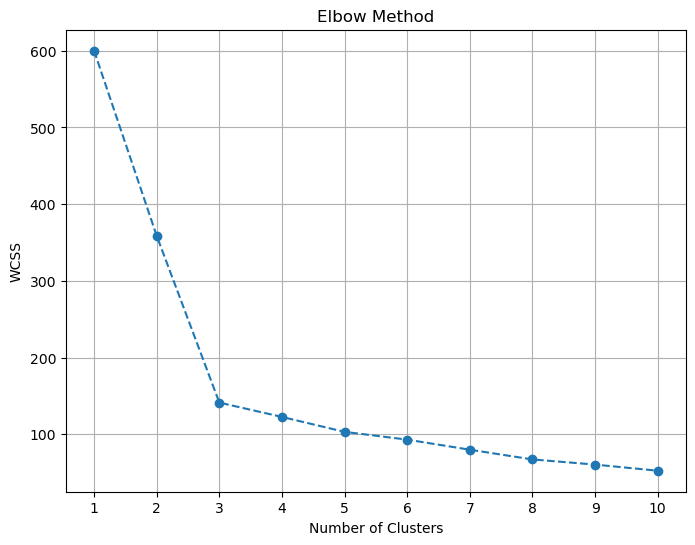

In [7]:
wcss = []   # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init ='auto', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, n_init ='auto')
kmeans.fit(scaled_data)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

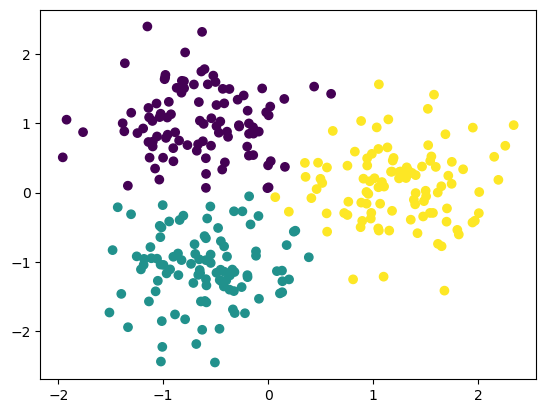

In [10]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c= cluster_labels)

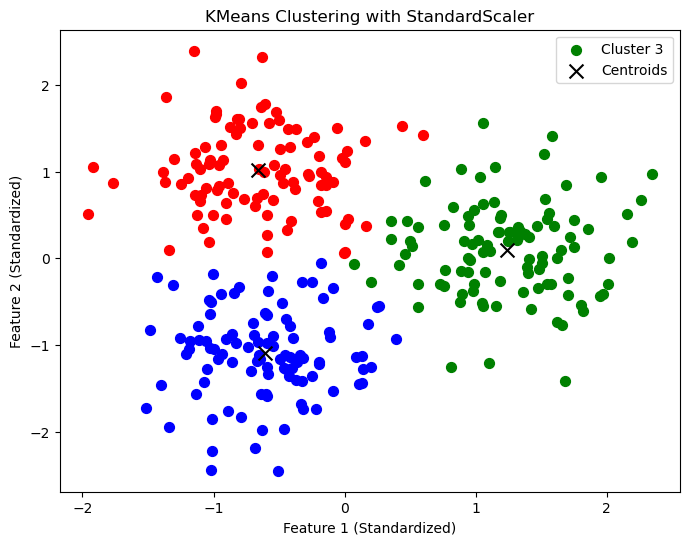

In [11]:
# Visualizing the clusters and centroids
plt.figure(figsize = (8, 6))

# Plotting data points with their assigned clusters
for i in range(len(scaled_data)):
    if cluster_labels[i] == 0:
        plt.scatter(scaled_data[i, 0], scaled_data[i, 1], color='red', s=50, label='Cluster 1' if i == 0 else "")
    elif cluster_labels[i] == 1:
        plt.scatter(scaled_data[i, 0], scaled_data[i, 1], color='blue', s=50, label='Cluster 2' if i == 0 else "")
    else:
        plt.scatter(scaled_data[i, 0], scaled_data[i, 1], color='green', s=50, label='Cluster 3' if i == 0 else "")

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('KMeans Clustering with StandardScaler')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()